<a href="https://colab.research.google.com/github/Areeba-28Faisal/Course_Recommender/blob/main/Course_Recommendation_with_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Course Recommendation with Predictive Analytics

Predictive Analytics to estimate grades of students by exploring and analysing academic and non-academic information of students

#### Import libraries for data analysis

In [2]:
import numpy as np
import pandas as pd

#### Import libraries for data visualisation

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Import libraries for machine learning

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Load and merge to unified dataset

In [8]:
df_mat = pd.read_csv("https://raw.githubusercontent.com/Areeba-28Faisal/Course_Recommender/main/student-mat.csv")

In [9]:
df_por = pd.read_csv("https://raw.githubusercontent.com/Areeba-28Faisal/Course_Recommender/main/student-por.csv")

In [10]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
df = pd.merge(df_mat, df_por, how='left', suffixes=(None, "_y"), left_on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], \
                          right_on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [12]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0


In [15]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'guardian_y',
       'traveltime_y', 'studytime_y', 'failures_y', 'schoolsup_y', 'famsup_y',
       'paid_y', 'activities_y', 'higher_y', 'romantic_y', 'famrel_y',
       'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y', 'health_y', 'absences_y',
       'G1_y', 'G2_y', 'G3_y'],
      dtype='object')

In [17]:
df_examples = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

In [21]:
df_examples

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,1,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,1,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,0,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,1,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,1,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1,1,20,1,0,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
403,1,1,17,1,0,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
404,1,1,21,0,1,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
405,1,1,18,0,0,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


#### Convert non-numerical data to numerical data

In [19]:
df_examples['school'] = df_examples['school'].map({'GP': 0, 'MS': 1}).astype(int)
df_examples['sex'] = df_examples['sex'].map({'F': 0, 'M': 1}).astype(int)
df_examples['address'] = df_examples['address'].map({'R': 0, 'U': 1}).astype(int)
df_examples['famsize'] = df_examples['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
df_examples['Pstatus'] = df_examples['Pstatus'].map({'A': 0, 'T': 1}).astype(int)
df_examples['Mjob'] = df_examples['Mjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
df_examples['Fjob'] = df_examples['Fjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
df_examples['reason'] = df_examples['reason'].map({'course': 0, 'other': 1, 'home': 2, 'reputation': 3}).astype(int)
df_examples['guardian'] = df_examples['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
df_examples['schoolsup'] = df_examples['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['famsup'] = df_examples['famsup'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['paid'] = df_examples['paid'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['activities'] = df_examples['activities'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['nursery'] = df_examples['nursery'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['higher'] = df_examples['higher'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['internet'] = df_examples['internet'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['romantic'] = df_examples['romantic'].map({'no': 0, 'yes': 1}).astype(int)

<ipython-input-19-f2ebdeebc08c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_examples['school'] = df_examples['school'].map({'GP': 0, 'MS': 1}).astype(int)
<ipython-input-19-f2ebdeebc08c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_examples['sex'] = df_examples['sex'].map({'F': 0, 'M': 1}).astype(int)
<ipython-input-19-f2ebdeebc08c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

#### Correlation of features

In [24]:
corr = df_examples.corr()
corr

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.025139,0.376704,-0.277095,-0.065662,0.044307,-0.144265,-0.090747,-0.064173,0.011223,...,-0.072780,0.015606,-0.020438,0.112023,0.059819,-0.037768,-0.089104,-0.033213,-0.056573,-0.054836
sex,-0.025139,1.000000,-0.033941,-0.019370,-0.077758,0.028501,0.092762,0.049241,0.202360,0.095259,...,0.065760,0.232397,0.071819,0.259949,0.263709,0.143266,-0.070324,0.092725,0.089692,0.095790
age,0.376704,-0.033941,1.000000,-0.142339,-0.034142,0.031052,-0.167380,-0.166154,-0.066866,-0.037473,...,0.042374,0.012131,0.125013,0.128170,0.116355,-0.066089,0.176582,-0.075825,-0.151792,-0.171036
address,-0.277095,-0.019370,-0.142339,1.000000,-0.061787,-0.036980,0.139377,0.074585,0.118235,0.005054,...,0.016206,0.033076,0.065796,-0.098214,-0.105325,-0.033840,-0.031959,0.063657,0.117673,0.094048
famsize,-0.065662,-0.077758,-0.034142,-0.061787,1.000000,0.154814,0.046279,0.062380,-0.056174,0.091003,...,0.024875,-0.018556,-0.024308,-0.107035,-0.108456,0.035555,-0.040535,-0.075366,-0.084788,-0.088003
Pstatus,0.044307,0.028501,0.031052,-0.036980,0.154814,1.000000,-0.118969,-0.083684,-0.046197,0.037778,...,0.025997,0.037315,0.002427,-0.033925,0.002447,0.025812,-0.136273,-0.019516,-0.043529,-0.061265
Medu,-0.144265,0.092762,-0.167380,0.139377,0.046279,-0.118969,1.000000,0.636912,0.465079,0.176764,...,0.007157,0.029391,0.067240,0.022161,-0.035959,-0.046327,0.101653,0.212098,0.219660,0.211189
Fedu,-0.090747,0.049241,-0.166154,0.074585,0.062380,-0.083684,0.636912,1.000000,0.264063,0.220627,...,0.007780,-0.018866,0.046560,0.005353,-0.001700,0.014385,0.028604,0.200475,0.176011,0.150686
Mjob,-0.064173,0.202360,-0.066866,0.118235,-0.056174,-0.046197,0.465079,0.264063,1.000000,0.215293,...,0.042303,0.106848,0.006371,0.071133,-0.011296,0.068686,0.048305,0.081243,0.096125,0.088955
Fjob,0.011223,0.095259,-0.037473,0.005054,0.091003,0.037778,0.176764,0.220627,0.215293,1.000000,...,0.016181,-0.044994,0.011317,0.077288,0.069031,-0.009969,0.006344,0.057830,0.064969,0.032541


Check if there're any null values in the dataset

<AxesSubplot:>

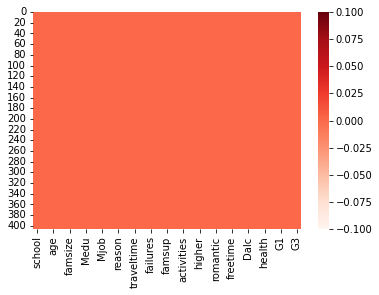

In [ ]:
sns.heatmap(df_examples.isnull(),cmap='Reds')

Draw heatmap with computed correlation scores

<AxesSubplot:>

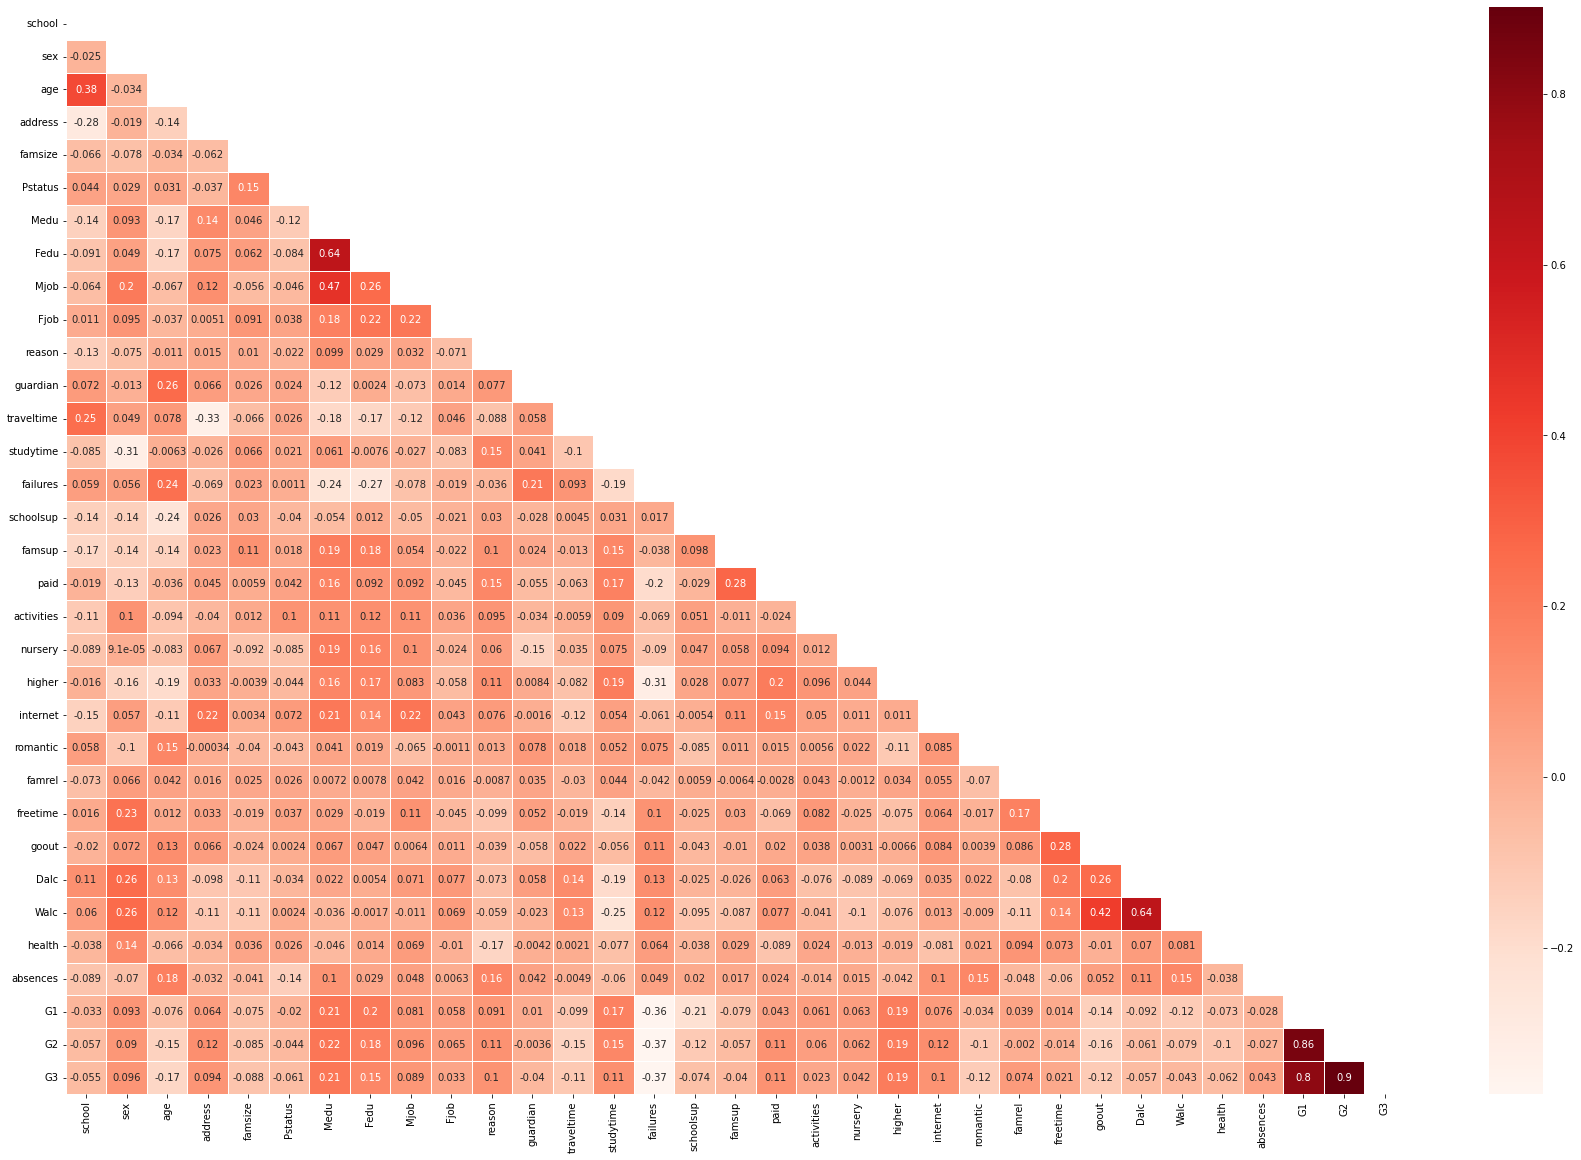

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(30,20))
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='Reds',annot=True)

#### Role of study time in grades

Generate Boxplots for study Time

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

<Axes: xlabel='G3', ylabel='studytime'>

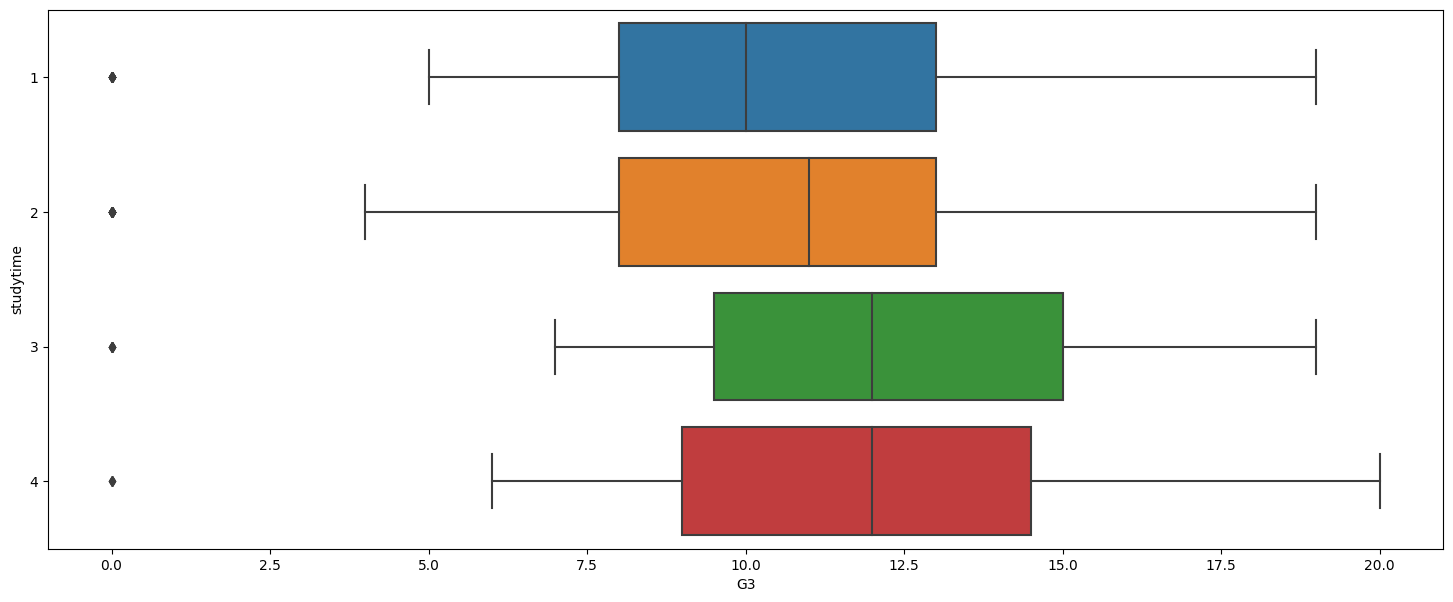

In [25]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="studytime", data=df_examples, orient='h')

#### Analysis of travel time and grades

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

<Axes: xlabel='G3', ylabel='traveltime'>

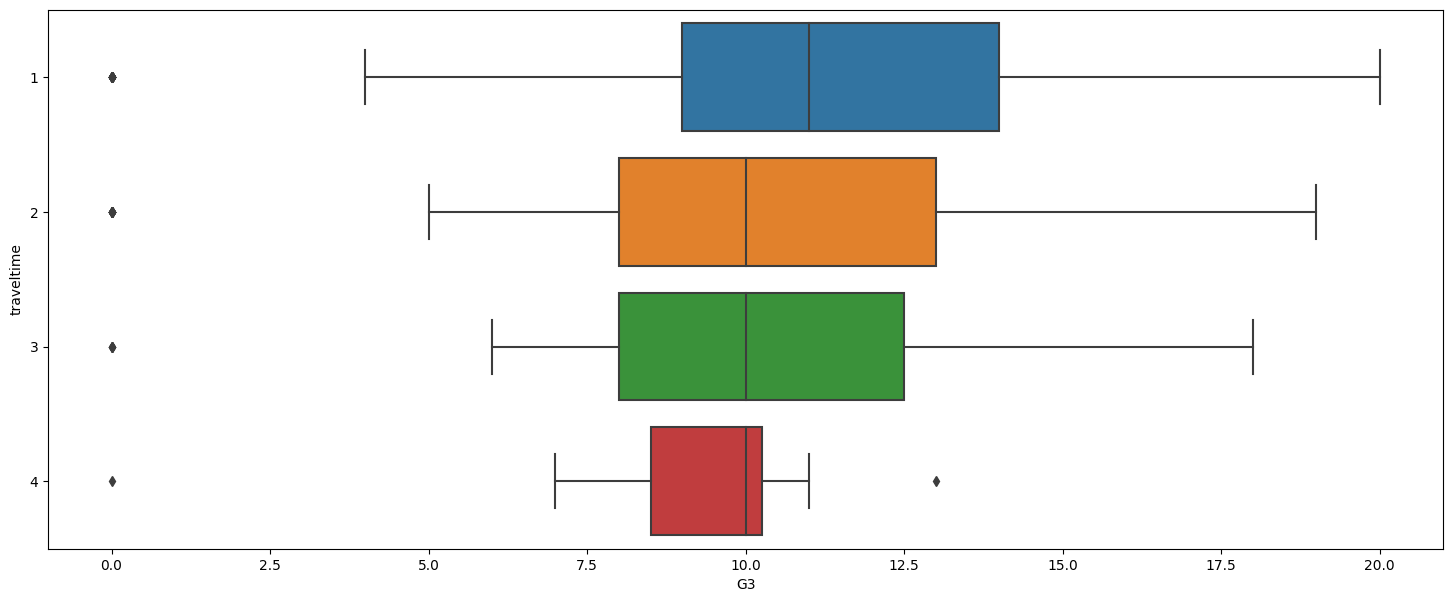

In [26]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="traveltime", data=df_examples, orient='h')

#### Internet connectivity influence with grades

internet - Internet access at home (binary: yes(1) or no(0))

<Axes: xlabel='G3', ylabel='internet'>

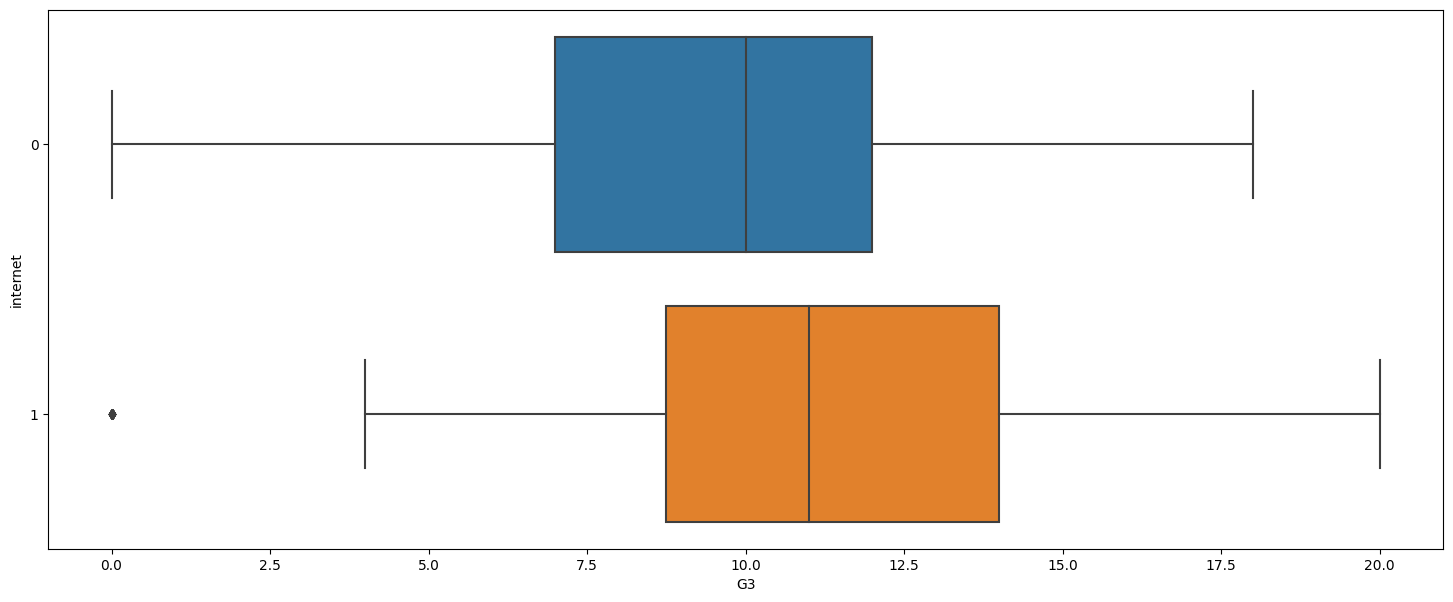

In [27]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="internet", data=df_examples, orient='h')

#### Students with interest to pursue higher education and their grades

higher - wants to take higher education (binary: yes(1) or no(0))

<Axes: xlabel='G3', ylabel='higher'>

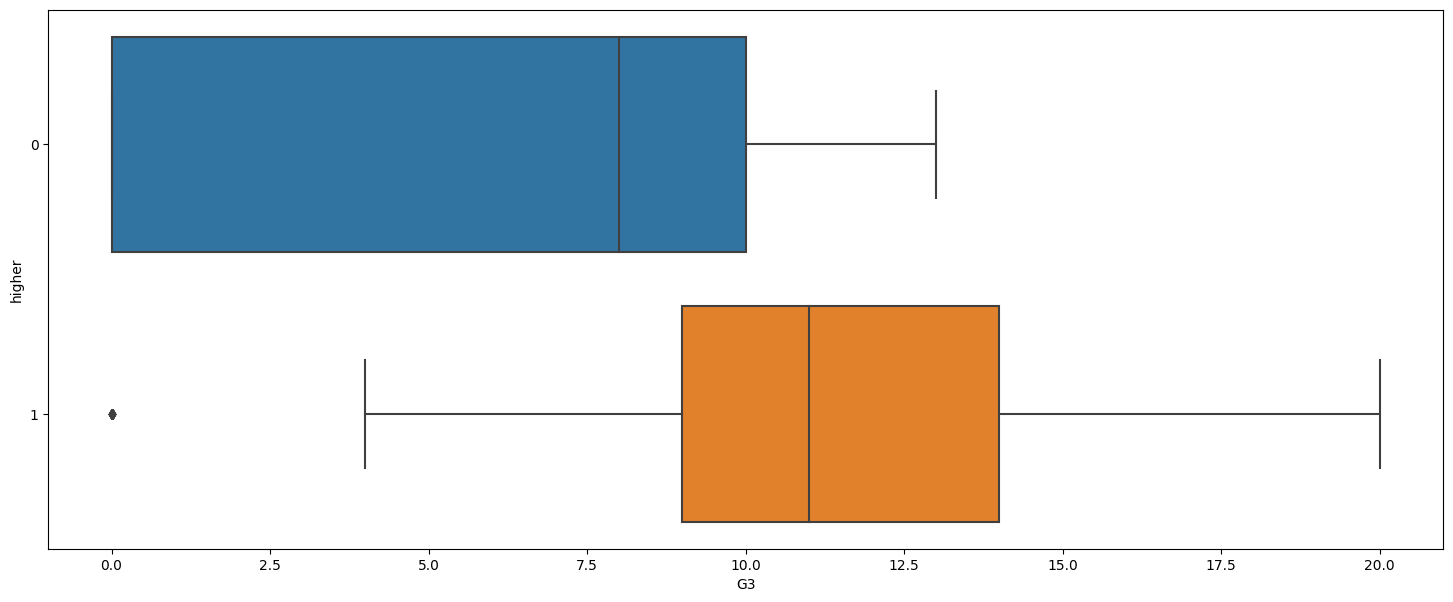

In [28]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="higher", data=df_examples, orient='h')

#### Past class failures effect on current grades

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

<Axes: xlabel='failures', ylabel='G3'>

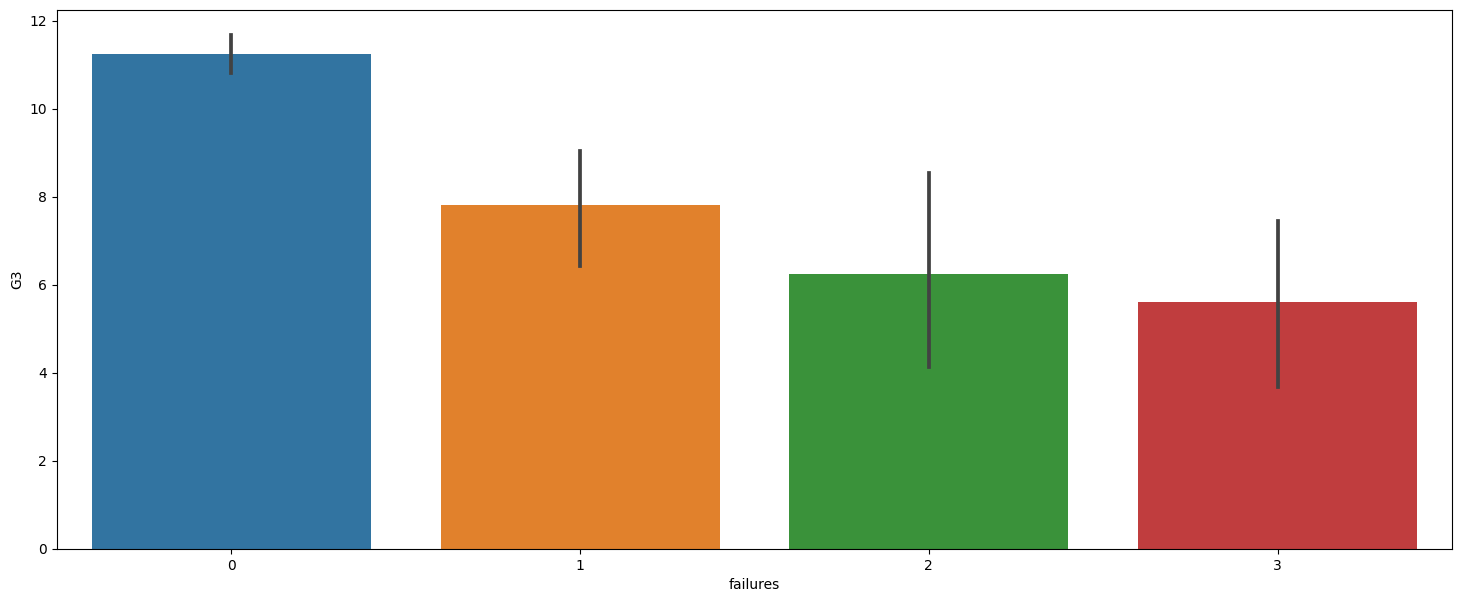

In [34]:
plt.figure(figsize=(18,7))
#sns.boxplot(x="G3", y="failures", data=df_examples, orient='h')
sns.barplot(x="failures", y="G3", data=df_examples)

#### Periodical grades distribution

These grades are related with the course subject, Math:

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)

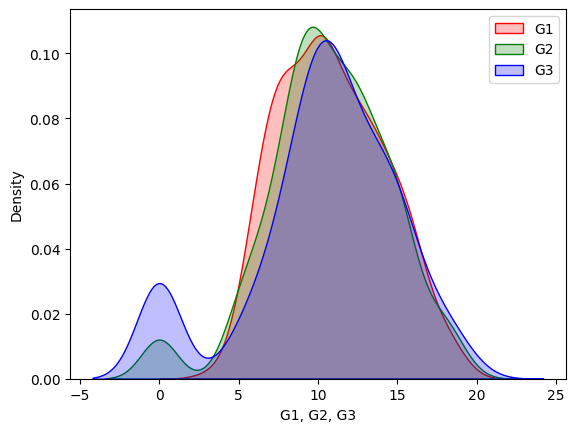

In [39]:
sns.kdeplot(df_examples['G1'],fill=True,color='red')
sns.kdeplot(df_examples['G2'],color='green',fill=True)
sns.kdeplot(df_examples['G3'],color='blue',fill=True)
plt.xlabel("G1, G2, G3")
plt.legend(labels=["G1", "G2", "G3"])
plt.show()

#### Separation of input and target variables

In [40]:
df_X = df_examples.loc[:, df_examples.columns != 'G3']
df_X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,1,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,1,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,0,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,1,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,1,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10


In [42]:
df_y = df_examples.loc[:, 'G3']
df_y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

#### Split dataset into train and test sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=48, shuffle=True)

### Model building and evaluation

#### Linear Regression

In [44]:
lr = LinearRegression()

In [45]:
reg = lr.fit(X_train, y_train)

In [46]:
reg.score(X_train, y_train)

0.835455124736799

In [47]:
y_pred = lr.predict(X_test)

In [48]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  3.483221290231701
mean_absolute_error:  1.2279270166716885
r2_score:  0.8461484100753536
median_absolute_error:  0.8460434653414683


#### Random Forest

In [49]:
rfr  = RandomForestRegressor()

In [50]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
rfr.score(X_train, y_train)

0.9814852627835527

##### collect important featues

In [ ]:
feats = {}
for feature, importance in zip(df_examples.columns, rfr.feature_importances_):
    feats[feature] = importance

In [ ]:
sorted(feats, key=feats.get, reverse=True)

In [52]:
y_pred = rfr.predict(X_test)

In [53]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  2.271093137254902
mean_absolute_error:  0.9663725490196079
r2_score:  0.8996873121402007
median_absolute_error:  0.6550000000000002


In [54]:
y_pred

array([16.56,  7.02, 10.68,  5.32, 10.08, 11.18,  2.33,  2.28, 11.18,
       15.88, 10.21,  8.45, 18.81, 13.43,  7.75, 18.1 ,  2.94,  9.96,
        0.51,  4.41, 12.12,  5.88, 15.61,  9.97,  0.25,  5.95, 13.76,
       15.64, 12.99, 13.05, 15.97,  2.89,  0.48,  0.89,  8.86, 12.03,
       13.14, 10.03,  8.86,  9.37,  9.78, 10.54,  0.7 , 18.14,  7.04,
       11.19, 12.29, 10.98,  7.73, 11.51, 11.39, 13.29, 11.08, 10.99,
        9.9 , 10.01, 15.31, 11.46, 13.98,  9.54, 12.31, 10.9 , 11.28,
       10.02, 10.83, 12.08, 18.03,  9.21,  8.71, 11.61, 13.13,  0.67,
       13.36, 11.11,  0.58, 15.87, 15.22, 10.9 , 10.05,  5.84,  2.84,
       12.87,  9.88,  9.92,  9.25, 12.39, 14.07,  6.86, 18.38,  9.16,
       12.2 ,  8.68, 10.6 ,  9.73, 15.67, 15.83, 15.46,  0.37,  8.67,
       17.41,  3.49, 10.86])

#### Decision Tree

In [55]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_train, y_train)

1.0

In [56]:
y_pred = dtr.predict(X_test)

In [57]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  3.6862745098039214
mean_absolute_error:  1.0
r2_score:  0.8371796831219114
median_absolute_error:  1.0


#### SVM

In [58]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_train, y_train)

0.7828329592387693

In [59]:
y_pred = svr.predict(X_test)

In [60]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  4.3158177525166845
mean_absolute_error:  1.2042227628355857
r2_score:  0.8093731727835363
median_absolute_error:  0.7175244713654108


#### ANN

In [72]:
def build_and_compile_model():
    model = keras.Sequential([
#       norm,
      layers.Input(32,),
      layers.Dense(64, activation='softmax'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation ='relu'),
      layers.Dense(1,)
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
    return model

In [73]:
model = build_and_compile_model()

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 14721 (57.50 KB)
Trainable params: 14721 (57.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
%%time
history = model.fit(
    x=X_train,
    y=y_train,
#     validation_split=0.2,
#  verbose=1,
    epochs=200)

Epoch 1/200
10/10 [==============================] - 1s 3ms/step - loss: 8.0192
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 4.3541
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 3.8182
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 3.3272
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 2.8892
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 2.5299
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 2.4851
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 2.1989
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 2.8174
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 2.5848
Epoch 11/200
10/10 [==============================] - 0s 2ms/step - loss: 1.8722
Epoch 12/200
10/10 [==============================] - 0s 2ms/step - loss: 1.8030
Epoch 13/200
10/10 [=================

In [79]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  #plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

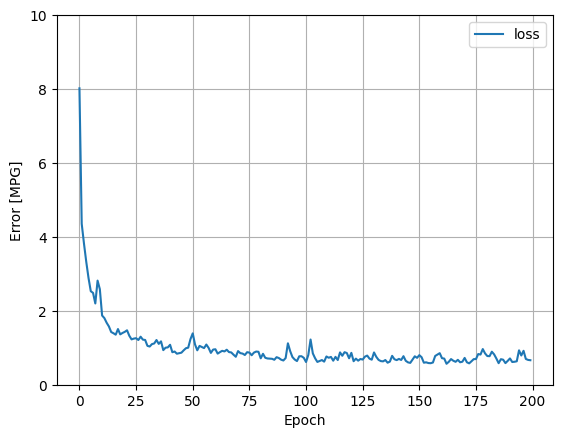

In [80]:
plot_loss(history)

In [81]:
y_pred_train = model.predict(X_train)
print("r2_score: ", metrics.r2_score(y_train, y_pred_train))

10/10 [==============================] - 0s 1ms/step
r2_score:  0.954061497990411


In [84]:
y_pred = model.predict(X_test)

print("r2_score: ", metrics.r2_score(y_test, y_pred))

4/4 [==============================] - 0s 2ms/step
r2_score:  0.8043068485473428


In [85]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  4.430520034445453
mean_absolute_error:  1.3898438183115978
r2_score:  0.8043068485473428
median_absolute_error:  0.9708099365234375


#### Recommendation here

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)
   
Criteria to recommend the subject Math for higher education
    
 G1 + G2 + G3(predicted) >= Max obtainable grade in a test(20)

In [86]:
df_pred = pd.DataFrame(y_pred.tolist(), columns=["pred"])

In [87]:
lists = [X_test.G1.to_list(), X_test.G2.to_list(), df_pred.pred.to_list()]

In [88]:
tot_grad = list(map(sum, zip(*lists)))
np.where(np.array(tot_grad) >= 20)[0]

array([  0,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,  14,
        15,  17,  19,  20,  21,  22,  23,  26,  27,  28,  29,  30,  31,
        34,  35,  36,  37,  38,  39,  40,  41,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  72,  73,  75,
        76,  77,  78,  79,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  98,  99, 101])

In [93]:
np.where(np.array(tot_grad) < 20)

(array([  1,   7,  16,  18,  24,  25,  32,  33,  42,  71,  74,  80,  97,
        100]),)

In [96]:
#those who can choose maths as their subject

X_test.reset_index().loc[np.where(np.array(tot_grad) > 20)[0]]

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,370,1,0,18,1,0,1,1,1,0,...,0,5,3,2,1,1,4,0,18,16
2,235,0,0,17,1,1,0,2,1,2,...,1,3,2,3,1,2,3,10,12,10
3,358,0,1,18,1,1,1,4,3,4,...,1,5,4,5,2,3,5,0,10,10
4,349,0,0,17,0,1,0,3,2,2,...,0,4,3,3,2,3,2,4,9,10
5,375,1,0,17,0,1,1,1,2,2,...,0,3,2,2,1,2,3,0,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,228,0,0,16,1,1,1,2,3,3,...,0,2,3,1,1,1,3,2,16,16
96,353,0,1,18,1,0,1,3,4,3,...,1,4,3,3,1,3,5,11,16,15
98,45,0,0,15,1,0,0,4,3,2,...,1,5,2,2,1,1,5,8,8,8
99,312,0,0,17,1,1,1,3,2,1,...,0,5,2,2,1,2,5,0,17,17
